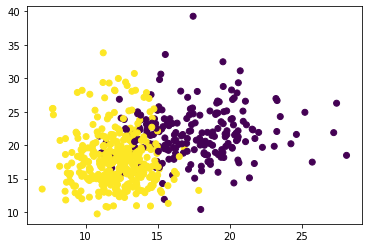

In [13]:
X, y = load_breast_cancer(return_X_y=True) 
X = X[:, :2]
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.show()

In [1]:
#python
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt
import numpy as np

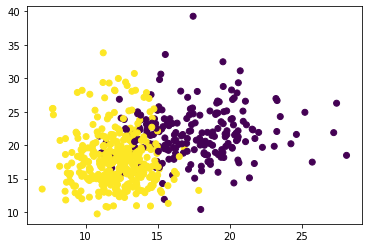

In [2]:
# problem 1

X, y = load_breast_cancer(return_X_y=True) 
X = X[:, :2]
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# problem 1 question a)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(X_train, y_train)
y_pre_train = clf_model.predict(X_train)
y_predict = clf_model.predict(X_test)
acc_train = accuracy_score(y_train,y_pre_train)
acc_test = accuracy_score(y_test,y_predict)

print('The test accuracy is {} and the train accuracy is {}.'.format(acc_train,acc_test))

The test accuracy is 1.0 and the train accuracy is 0.8391608391608392.


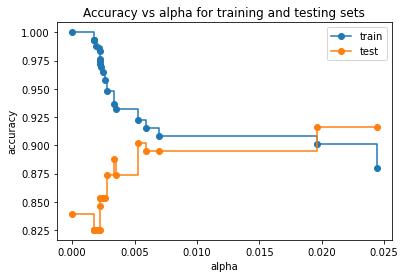

In [5]:
# b)
clf_models = DecisionTreeClassifier(random_state=42)
path = clf_models.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [7]:
# Python
def plot_regions(tree):
    plot_colors = ['yellow', 'purple'] 
    plot_step = 0.02
    
    breast_cancer = load_breast_cancer() 
    X = breast_cancer.data
    y = breast_cancer.target

    plt.clf()
    
    idx = np.arange(X.shape[0])
    
    np.random.shuffle(idx) 
    X = X[idx]
    y = y[idx]
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(breast_cancer.feature_names[0]) 
    plt.ylabel(breast_cancer.feature_names[1]) 
    plt.axis("tight")
    
    for i, color in zip(range(2), plot_colors): 
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=breast_cancer.target_names[i], cmap=plt.cm.Paired)

Text(0.5, 1.0, 'decision tree without regulation')

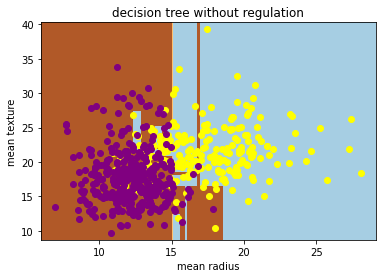

In [8]:
# problem c)
plot_regions(clf_model)
plt.title('decision tree without regulation')

Text(0.5, 1.0, 'decision tree with regulation')

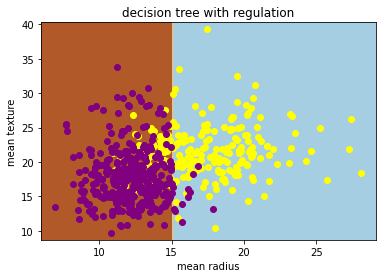

In [9]:
plot_regions(clfs[-1])
plt.title('decision tree with regulation')

In [10]:
# problem 2

In [3]:
#python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_circles

In [148]:
# create dataset
X, y = make_circles(n_samples=400, noise=0.2, factor=0.5, random_state =0)
X = StandardScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [149]:
# problem 2 question a)
# clf = ...
clf = DecisionTreeClassifier(random_state=42, max_depth=1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
acc_test = accuracy_score(y_test,y_predict)

print('The test accuracy is {:.4f}.'.format(acc_test))

The test accuracy is 0.5375.


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/4058213968.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


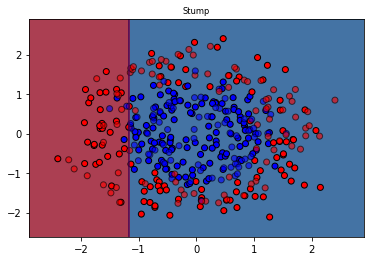

In [151]:
# plotting
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("Stump", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [152]:
# problem 2 question b)
import copy
from sklearn.utils import resample
class Bagging ():
    def __init__(self, base_classifier, n_bootstrap, portion):
        self.base_classifier = base_classifier 
        self.n_bootstrap = n_bootstrap
        self.portion = portion 
        self.base_classifier_list = []
        
    def fit(self, X_train, y_train):
        for i in range(self.n_bootstrap):
            clf = copy.deepcopy(self.base_classifier)
            Xtrain, ytrain = resample(X_train, y_train, n_samples = int(self.portion*len(y)))
            clf.fit(Xtrain, ytrain)
            self.base_classifier_list.append(clf)

    def predict_proba(self, X_test):
        # RETURN AVERAGED PREDICTED PROBABILITY FOR CLASS 1
        count = np.zeros(X_test.shape[0])
        for i in range(self.n_bootstrap):
            count = count + self.base_classifier_list[i].predict(X_test)
        for i in range(X_test.shape[0]):
            if count[i]/self.n_bootstrap >= 0.5:
                count[i] = 1
            else:
                count[i] = 0
        return count

    def score(self, X_test, y_test):
        y_pred = self.predict_proba(X_test)
        acc = sum(np.round(y_pred) == y_test) / len(y_test) 
        return acc

In [153]:
# train using bagging class
clf = Bagging(DecisionTreeClassifier(max_depth=1), n_bootstrap=200, portion=0.8)
clf.fit(X_train , y_train)

y_predict = clf.predict_proba(X_test)
acc_test = clf.score(X_test, y_test)

print('The test accuracy is {:.4f}.'.format(acc_test))

The test accuracy is 0.4813.


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/719996533.py:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


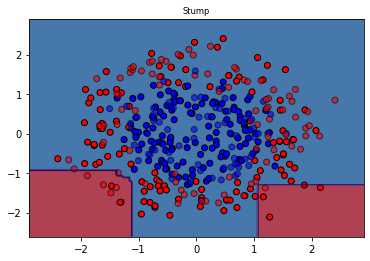

In [155]:
# plotting the result
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:]
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("Stump", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [ ]:
# the accuracy ratio actually decreases with this bagging class
# We try a few combinations of n_bootstrap and portion to find
# a relatively good bagging model as follows:

In [102]:
portionL = np.linspace(0.1,0.95,10)
n_bootstrapL = np.linspace(10,1000,10)

best_acc = -1
best_por = 0
best_n = 0
for i in range(10):
    for j in range(10):
        clf = Bagging(DecisionTreeClassifier(max_depth=1), n_bootstrap=int(n_bootstrapL[i]), portion=portionL[j])
        clf.fit(X_train , y_train)
        y_predict = clf.predict_proba(X_test)
        acc_test = clf.score(X_test, y_test)
        print('portion={}, n_bootstrap={}, test accuracy={}'.format(portionL[j],n_bootstrapL[i], acc_test))
        
        if acc_test > best_acc:
            best_acc = acc_test
            best_por = portionL[j]
            best_n = n_bootstrapL[i]

print('The best test accuracy is {:.4f} with n_bootstrap={} and portion={}.'.format(best_acc, best_n, best_por))

portion=0.1, n_bootstrap=10.0, test accuracy=0.55625
portion=0.19444444444444445, n_bootstrap=10.0, test accuracy=0.475
portion=0.28888888888888886, n_bootstrap=10.0, test accuracy=0.45
portion=0.3833333333333333, n_bootstrap=10.0, test accuracy=0.4875
portion=0.47777777777777775, n_bootstrap=10.0, test accuracy=0.49375
portion=0.5722222222222222, n_bootstrap=10.0, test accuracy=0.5375
portion=0.6666666666666666, n_bootstrap=10.0, test accuracy=0.5375
portion=0.7611111111111111, n_bootstrap=10.0, test accuracy=0.5375
portion=0.8555555555555555, n_bootstrap=10.0, test accuracy=0.48125
portion=0.95, n_bootstrap=10.0, test accuracy=0.48125
portion=0.1, n_bootstrap=120.0, test accuracy=0.49375
portion=0.19444444444444445, n_bootstrap=120.0, test accuracy=0.49375
portion=0.28888888888888886, n_bootstrap=120.0, test accuracy=0.54375
portion=0.3833333333333333, n_bootstrap=120.0, test accuracy=0.475
portion=0.47777777777777775, n_bootstrap=120.0, test accuracy=0.4875
portion=0.572222222222222

In [114]:
# test accuracy and plot for n_bootstrap=10 and portion=0.1
clf = Bagging(DecisionTreeClassifier(max_depth=1), n_bootstrap=10, portion=0.1)
clf.fit(X_train , y_train)
y_predict = clf.predict_proba(X_test)
acc_test = clf.score(X_test, y_test)

print('portion={}, n_bootstrap={}, test accuracy={}'.format(portionL[j],n_bootstrapL[i], acc_test))

portion=0.95, n_bootstrap=1000.0, test accuracy=0.55


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/2357736067.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


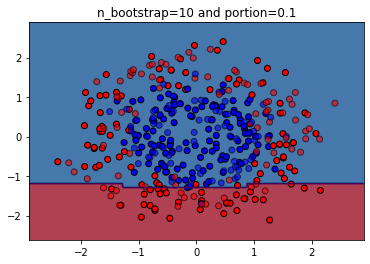

In [115]:
# plotting
# plotting the result
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:]
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("n_bootstrap=10 and portion=0.1")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [120]:
# test accuracy and plot for n_bootstrap=340 and portion=2/3
clf = Bagging(DecisionTreeClassifier(max_depth=1), n_bootstrap=240, portion=2/3)
clf.fit(X_train , y_train)
y_predict = clf.predict_proba(X_test)
acc_test = clf.score(X_test, y_test)

print('portion={}, n_bootstrap={}, test accuracy={}'.format(portionL[j],n_bootstrapL[i], acc_test))

portion=0.95, n_bootstrap=1000.0, test accuracy=0.5375


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/1518474765.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


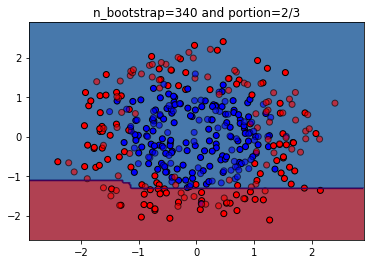

In [121]:
# plotting
# plotting the result
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:]
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("n_bootstrap=340 and portion=2/3")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [122]:
# problem 2 question c)

In [209]:
class Boosting ():
    
    def __init__(self, base_classifier, n_iterations):
        self.base_classifier = base_classifier 
        self.n_iterations = n_iterations
        self.alphalist = []
        self.classilist = []


    def fit(self, X_train, y_train):
        wt = np.ones(X_train.shape[0])/X_train.shape[0]
        y_train = 2*y_train-1
        clf = copy.deepcopy(self.base_classifier)
        for i in range(self.n_iterations):
            clf = copy.deepcopy(self.base_classifier)
            clf.fit(X_train,y_train,sample_weight=wt)
            pred_train = clf.predict(X_train)
            # indicators
            predmiss = np.zeros(X_train.shape[0])
            predmiss1 = -np.ones(X_train.shape[0])
            for i in range(X_train.shape[0]):
                if pred_train[i]!=y_train[i]:
                    predmiss[i] = 1
                    predmiss1[i] = 1
            err = np.dot(wt,predmiss)/sum(wt)
            alpha = 0.5*np.log((1-err)/float(err))
            wt = np.multiply(wt, np.exp(predmiss1*alpha))
            self.alphalist.append(alpha)
            self.classilist.append(clf)
            


    def predict_label(self, X_test):
        # RETURN A NUMBER BETWEEN -1 AND 1 #
        count = np.zeros(X_test.shape[0])
        for i in range(self.n_iterations):
            count = count + self.alphalist[i]*self.classilist[i].predict(X_test)
        return np.sign(count)

    def score(self, X_test, y_test):
        y_test = 2 * y_test - 1
        y_pred = self.predict_label(X_test)
        acc = sum(np.sign(y_pred) == y_test) / len(y_test) 
        return acc

In [210]:
# for the base case
clf = Boosting(DecisionTreeClassifier(max_depth=1), n_iterations =200)
clf.fit(X_train , y_train)

In [212]:
acc_score = clf.score(X_test, y_test)
y_predict = clf.predict_label(X_test)
print('For boosting method, we get test accuracy={:.4f}'.format(acc_score))

For boosting method, we get test accuracy=0.8688


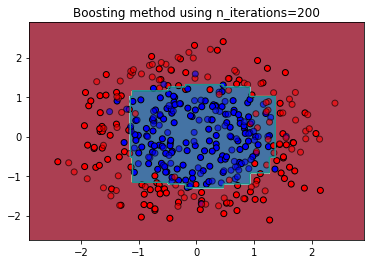

In [214]:
# PLOT FIGURE HERE #
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = 2*clf.predict_label(np.c_[xx.ravel(), yy.ravel()])[:]-1
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("Boosting method using n_iterations=200")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [ ]:
# Boosting method is better than both base calssifier and bagging

In [225]:
# Experiment with the n_iterations
n_list = np.linspace(0,2000,21)

for i in range(20):
    clf = Boosting(DecisionTreeClassifier(max_depth=1), n_iterations =int(n_list[i+1]))
    clf.fit(X_train , y_train)
    acc_score1 = clf.score(X_test, y_test)
    acc_score2 = clf.score(X_train, y_train)
    print('For n_iterations={}, training accuracy is {:.4f} and test is {:.4f}'.format(n_list[i],acc_score2,acc_score1))

For n_iterations=0.0, training accuracy is 0.9417 and test is 0.8625
For n_iterations=100.0, training accuracy is 0.9500 and test is 0.8688
For n_iterations=200.0, training accuracy is 0.9625 and test is 0.8500
For n_iterations=300.0, training accuracy is 0.9792 and test is 0.8500
For n_iterations=400.0, training accuracy is 0.9833 and test is 0.8375
For n_iterations=500.0, training accuracy is 0.9833 and test is 0.8313
For n_iterations=600.0, training accuracy is 1.0000 and test is 0.8313
For n_iterations=700.0, training accuracy is 1.0000 and test is 0.8250
For n_iterations=800.0, training accuracy is 1.0000 and test is 0.8375
For n_iterations=900.0, training accuracy is 1.0000 and test is 0.8375
For n_iterations=1000.0, training accuracy is 1.0000 and test is 0.8250
For n_iterations=1100.0, training accuracy is 1.0000 and test is 0.8250
For n_iterations=1200.0, training accuracy is 1.0000 and test is 0.8250
For n_iterations=1300.0, training accuracy is 1.0000 and test is 0.8250
For 

In [226]:
# when the number of iterations is large, the model will overfit the 
# system
# , which gets 100% training accuracy and a decrease in testing accuracy

In [227]:
# problem 2 question d)
# For bagging

In [233]:
# test accuracy and plot for n_bootstrap=340 and portion=2/3
clf = Bagging(DecisionTreeClassifier(max_depth=5), n_bootstrap=340, portion=2/3)
clf.fit(X_train , y_train)
y_predict = clf.predict_proba(X_test)
acc_test = clf.score(X_test, y_test)

print('portion={:.4f}, n_bootstrap={}, test accuracy={}'.format(2/3,240, acc_test))

portion=0.6667, n_bootstrap=240, test accuracy=0.85


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/1518474765.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


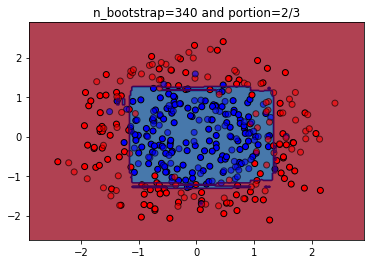

In [234]:
# plotting
# plotting the result
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:]
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("n_bootstrap=340 and portion=2/3")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [235]:
# test accuracy and plot for n_bootstrap=200 and portion=0.8
clf = Bagging(DecisionTreeClassifier(max_depth=5), n_bootstrap=200, portion=0.8)
clf.fit(X_train , y_train)
y_predict = clf.predict_proba(X_test)
acc_test = clf.score(X_test, y_test)

print('portion={:.4f}, n_bootstrap={}, test accuracy={}'.format(0.8,200, acc_test))

portion=0.8000, n_bootstrap=200, test accuracy=0.84375


/var/folders/fw/mf62n6r547vf3gx84rcy64y40000gp/T/ipykernel_27541/4107315742.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.round(Z), 0)


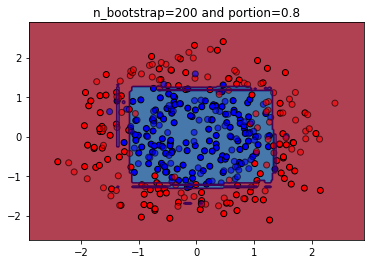

In [236]:
# plotting
# plotting the result
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:]
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("n_bootstrap=200 and portion=0.8")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [237]:
# For boosting method
# n_iteration=100
clf = Boosting(DecisionTreeClassifier(max_depth=5), n_iterations =100)
clf.fit(X_train , y_train)

In [238]:
acc_score = clf.score(X_test, y_test)
y_predict = clf.predict_label(X_test)
print('For boosting method, we get test accuracy={:.4f}'.format(acc_score))

For boosting method, we get test accuracy=0.8562


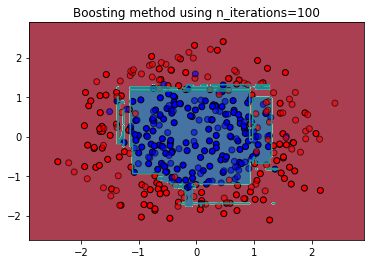

In [239]:
# PLOT FIGURE HERE #
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = 2*clf.predict_label(np.c_[xx.ravel(), yy.ravel()])[:]-1
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("Boosting method using n_iterations=100")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [240]:
# n_iterations = 500
clf = Boosting(DecisionTreeClassifier(max_depth=5), n_iterations =500)
clf.fit(X_train , y_train)

In [241]:
acc_score = clf.score(X_test, y_test)
y_predict = clf.predict_label(X_test)
print('For boosting method, we get test accuracy={:.4f}'.format(acc_score))

For boosting method, we get test accuracy=0.8438


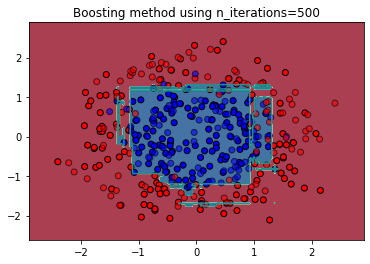

In [242]:
# PLOT FIGURE HERE #
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min , y_max , h))
Z = 2*clf.predict_label(np.c_[xx.ravel(), yy.ravel()])[:]-1
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("Boosting method using n_iterations=500")
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.contour(xx, yy, np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
            c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test , cmap=cm_bright , alpha=0.6, edgecolors='k')

In [243]:
# Larger depth is not a good choice for boosting method.
# For bagging method, the case is totally different.

In [244]:
# problem 3

In [27]:
import numpy as np 
import pandas as pd
df = pd.read_csv('diabetes.csv') 
df_name = df.columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
X = df[df_name[0:8]]
y = df[df_name[8]]
X = MinMaxScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size=0.25, random_state=0, stratify=df['Outcome'])

In [29]:
# problem 3 question a)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
clf3 = DecisionTreeClassifier()
clf2 = AdaBoostClassifier()
clf1 = RandomForestClassifier()
clf1.fit(X_train , y_train.to_numpy())
clf2.fit(X_train , y_train.to_numpy())
clf3.fit(X_train , y_train.to_numpy())

DecisionTreeClassifier()

In [31]:
score1 = cross_val_score(clf1, X_train, y_train.to_numpy(), cv=10)
score2 = cross_val_score(clf2, X_train, y_train.to_numpy(), cv=10)
score3 = cross_val_score(clf3, X_train, y_train.to_numpy(), cv=10)

Text(0.5, 1.0, 'CART')

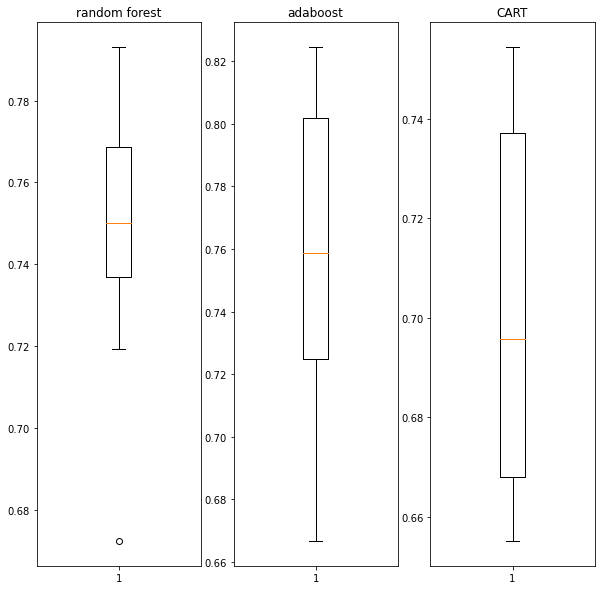

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].boxplot(score1)
axs[0].set_title('random forest')

axs[1].boxplot(score2)
axs[1].set_title('adaboost')

axs[2].boxplot(score3)
axs[2].set_title('CART')

In [22]:
# problem 3 question b)
from RemoveOutliers import removeOutliers

In [23]:
nameL = list(df.columns)
for i in range(len(nameL)):
    df = removeOutliers(df,nameL[i],drop=True)
    print(" ")

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.
 
Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.
 
Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.
 
Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.
 
Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.
 
Number of outliers (inc duplicates): 

In [24]:
# redoing question a) with new df

Text(0.5, 1.0, 'CART')

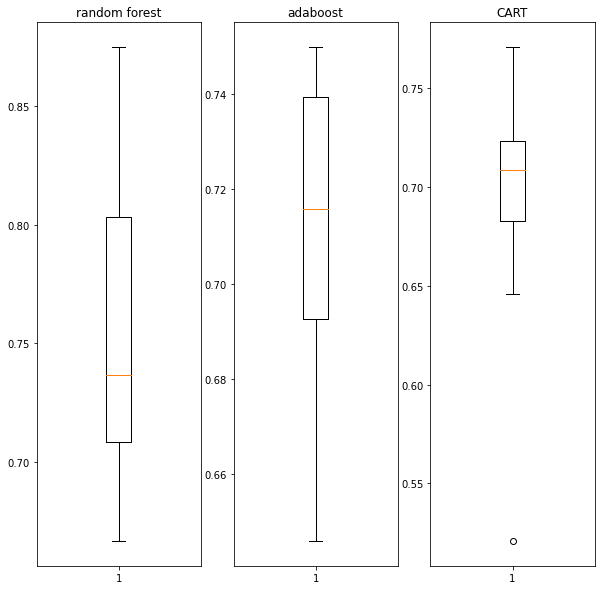

In [26]:
X = df[df_name[0:8]]
y = df[df_name[8]]
X = MinMaxScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size=0.25, random_state=0, stratify=df['Outcome'])

clf3 = DecisionTreeClassifier()
clf2 = AdaBoostClassifier()
clf1 = RandomForestClassifier()
clf1.fit(X_train , y_train.to_numpy())
clf2.fit(X_train , y_train.to_numpy())
clf3.fit(X_train , y_train.to_numpy())

score1 = cross_val_score(clf1, X_train, y_train.to_numpy(), cv=10)
score2 = cross_val_score(clf2, X_train, y_train.to_numpy(), cv=10)
score3 = cross_val_score(clf3, X_train, y_train.to_numpy(), cv=10)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].boxplot(score1)
axs[0].set_title('random forest')

axs[1].boxplot(score2)
axs[1].set_title('adaboost')

axs[2].boxplot(score3)
axs[2].set_title('CART')

In [33]:
# The performance actually does not improve by removing outliers for
# every column. I believe an improvement will be reached by removing
# less data points (too many points removed by including all the outliers
# in those columns).

In [40]:
# question 3 problem c)
# use the original df
df = pd.read_csv('diabetes.csv') 
df_name = df.columns
df.head()

X = df[df_name[0:8]]
y = df[df_name[8]]
X = MinMaxScaler().fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size=0.25, random_state=0, stratify=df['Outcome'])

In [41]:
# random forest
n_list = np.linspace(0,2000,21)
scorelist = np.zeros(20)
train_acc = np.zeros(20)

for i in range(20):
    clf = RandomForestClassifier(max_depth=5, n_estimators=int(n_list[i+1]))
    clf.fit(X_train , y_train.to_numpy())
    y_predict = clf.predict(X_train)
    
    scorelist[i] = np.mean(cross_val_score(clf, X_train, y_train.to_numpy(), cv=10))
    train_acc[i] = accuracy_score(y_train.to_numpy(),y_predict)
    
    print('For random forest with n_samples={}, train accuracy={:.4f} and CV scores={:.4f}'.format(n_list[i+1],train_acc[i],scorelist[i]))
    

For random forest with n_samples=100.0, train accuracy=0.8420 and CV scores=0.7534
For random forest with n_samples=200.0, train accuracy=0.8351 and CV scores=0.7604
For random forest with n_samples=300.0, train accuracy=0.8507 and CV scores=0.7621
For random forest with n_samples=400.0, train accuracy=0.8490 and CV scores=0.7552
For random forest with n_samples=500.0, train accuracy=0.8507 and CV scores=0.7586
For random forest with n_samples=600.0, train accuracy=0.8472 and CV scores=0.7535
For random forest with n_samples=700.0, train accuracy=0.8524 and CV scores=0.7551
For random forest with n_samples=800.0, train accuracy=0.8472 and CV scores=0.7552
For random forest with n_samples=900.0, train accuracy=0.8472 and CV scores=0.7552
For random forest with n_samples=1000.0, train accuracy=0.8507 and CV scores=0.7535
For random forest with n_samples=1100.0, train accuracy=0.8524 and CV scores=0.7552
For random forest with n_samples=1200.0, train accuracy=0.8507 and CV scores=0.7569
F

Text(0, 0.5, 'train accuracy')

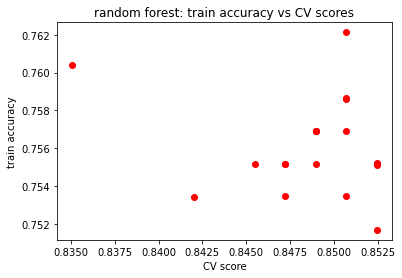

In [45]:
plt.plot(train_acc,scorelist, 'ro')
plt.title('random forest: train accuracy vs CV scores')
plt.xlabel('CV score')
plt.ylabel('train accuracy')

In [47]:
# AdaBoost classifiers
n_list = np.linspace(0,2000,21)
scorelist = np.zeros(20)
train_acc = np.zeros(20)

for i in range(20):
    clf = AdaBoostClassifier(n_estimators=int(n_list[i+1]))
    clf.fit(X_train , y_train.to_numpy())
    y_predict = clf.predict(X_train)
    
    scorelist[i] = np.mean(cross_val_score(clf, X_train, y_train.to_numpy(), cv=10))
    train_acc[i] = accuracy_score(y_train.to_numpy(),y_predict)
    
    print('For AdaBoost classifier with n_iterations={}, train accuracy={:.4f} and CV scores={:.4f}'.format(n_list[i+1],train_acc[i],scorelist[i]))
    

For AdaBoost classifier with n_iterations=100.0, train accuracy=0.8576 and CV scores=0.7379
For AdaBoost classifier with n_iterations=200.0, train accuracy=0.8958 and CV scores=0.7274
For AdaBoost classifier with n_iterations=300.0, train accuracy=0.9132 and CV scores=0.7256
For AdaBoost classifier with n_iterations=400.0, train accuracy=0.9288 and CV scores=0.7221
For AdaBoost classifier with n_iterations=500.0, train accuracy=0.9392 and CV scores=0.7273
For AdaBoost classifier with n_iterations=600.0, train accuracy=0.9531 and CV scores=0.7186
For AdaBoost classifier with n_iterations=700.0, train accuracy=0.9653 and CV scores=0.7169
For AdaBoost classifier with n_iterations=800.0, train accuracy=0.9740 and CV scores=0.7186
For AdaBoost classifier with n_iterations=900.0, train accuracy=0.9826 and CV scores=0.7169
For AdaBoost classifier with n_iterations=1000.0, train accuracy=0.9878 and CV scores=0.7083
For AdaBoost classifier with n_iterations=1100.0, train accuracy=0.9878 and CV 

Text(0, 0.5, 'train accuracy')

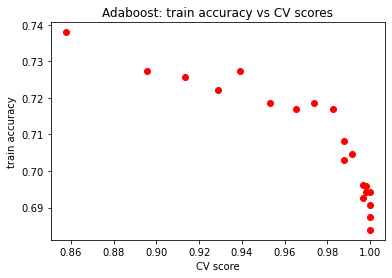

In [48]:
plt.plot(train_acc,scorelist, 'ro')
plt.title('Adaboost: train accuracy vs CV scores')
plt.xlabel('CV score')
plt.ylabel('train accuracy')

In [50]:
# problem 3 question d)
# The highest CV score I got is for random forest with 
# n_samples=200.0, train accuracy=0.8351 and CV scores=0.7604
clf = RandomForestClassifier(max_depth=5, n_estimators=200)
clf.fit(X_train , y_train.to_numpy())
y_predict = clf.predict(X_test)
print('The best model is random forest with n_samples=200 and the test accuracy is {:.4f}'.format(accuracy_score(y_test.to_numpy(),y_predict)))

The best model is random forest with n_samples=200 and the test accuracy is 0.7760
